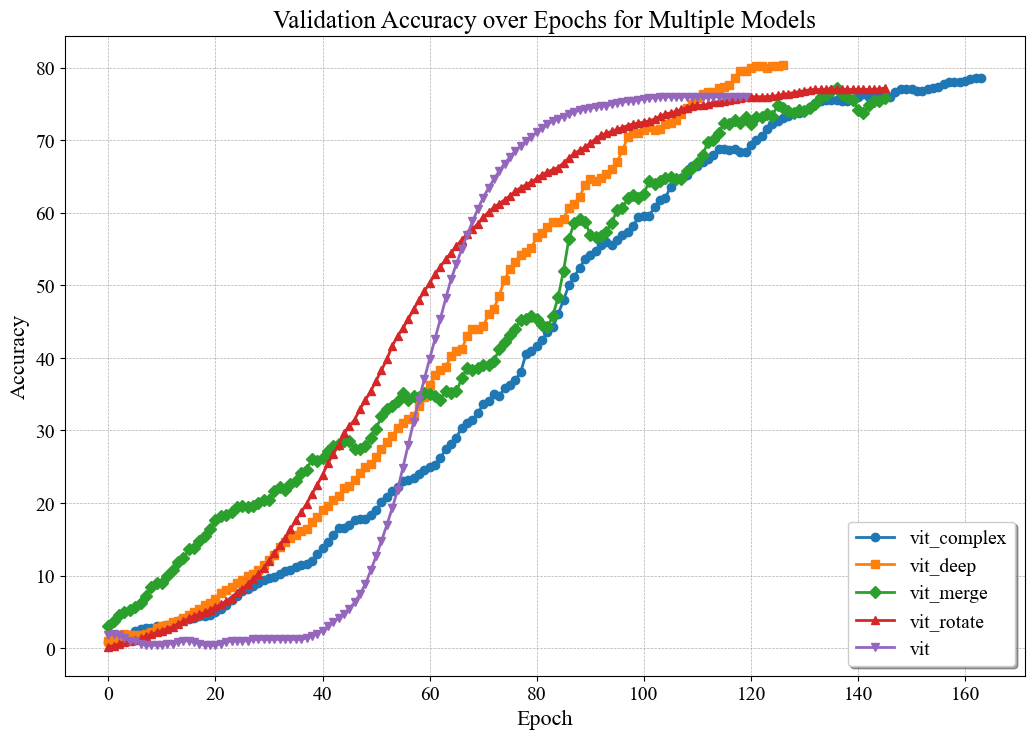

In [67]:
import re
import matplotlib.pyplot as plt
import os

# 设置字体为Times New Roman
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 14})

# 定义日志文件列表
logfiles = ["./log/vit_complex.log", "./log/vit_deep.log", "./log/vit_merge.log", "./log/vit_rotate.log", "./log/vit.log"]

# 用于存储每个文件的accuracy值
all_accuracies = []
all_epochs = []
labels = []

# 使用正则表达式匹配accuracy
accuracy_pattern = re.compile(r'Validation Accuracy after Epoch \d+: (\d+\.\d+)')

# 读取每个日志文件并提取accuracy
for logfile in logfiles:
    accuracies = []
    with open(logfile, 'r') as file:
        for line in file:
            match = accuracy_pattern.search(line)
            if match:
                accuracy = float(match.group(1))
                accuracies.append(accuracy)
    all_accuracies.append(accuracies)
    all_epochs.append(range(0, len(accuracies)))
    # 提取日志文件的名称作为标签（去掉路径和扩展名）
    labels.append(os.path.splitext(os.path.basename(logfile))[0])

# 设置图形大小和边距
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# 生成不同颜色和标记样式
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
markers = ['o', 's', 'D', '^', 'v']

# 为每个文件绘制accuracy曲线
for i in range(len(logfiles)):
    plt.plot(all_epochs[i], all_accuracies[i]*100, marker=markers[i], linestyle='-', color=colors[i], label=labels[i], linewidth=2)

# 添加图标题和标签
plt.title('Validation Accuracy over Epochs for Multiple Models', fontsize=18)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.grid(True, linestyle='--', linewidth=0.5)

# 设置每20个epoch显示一个x轴刻度
plt.xticks(range(0, max(len(acc) for acc in all_accuracies), 20), fontsize=14)
plt.yticks(fontsize=14)

# 显示图例并调整位置
plt.legend(fontsize=14, loc='lower right', frameon=True, shadow=True)
plt.savefig("Fig4.png", dpi=300, bbox_inches='tight' )
# 显示图像
plt.show()